In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

# Download the data

In [6]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)
data.drop(['Open','High','Low','Volume'],inplace=True, axis=1)
data = data.droplevel(0,axis=1).resample('M').last()
data

[*********************100%***********************]  9 of 9 completed
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_81032/4108455250.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.droplevel(0,axis=1).resample('M').last()


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,22.024281,33.847130,8.866621,20.734488,17.080410,17.734255,17.754026,24.451870,24.071123
2010-02-28 00:00:00+00:00,23.018082,34.865654,9.179263,21.840126,17.675304,18.296068,17.519550,24.545670,25.411646
2010-03-31 00:00:00+00:00,24.840219,35.847778,9.996115,23.738674,18.884245,18.985355,17.990925,25.200396,27.395514
2010-04-30 00:00:00+00:00,24.891493,37.337280,10.127730,24.749315,19.121326,18.781429,18.464060,24.219986,29.047241
2010-05-31 00:00:00+00:00,22.518780,33.061966,9.200187,22.492481,17.690697,17.911358,17.445017,22.643490,27.003420
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,91.096039,92.457512,41.475777,123.087158,209.791962,76.760468,72.138367,143.139130,175.592255
2024-06-30 00:00:00+00:00,88.309998,91.150002,41.110001,121.870003,226.229996,76.580002,68.139999,145.750000,182.399994
2024-07-31 00:00:00+00:00,92.139999,93.209999,43.740002,127.860001,218.800003,77.849998,72.790001,149.630005,187.490005


In [7]:
rets = data.pct_change().fillna(0)

In [8]:
pal = sns.color_palette('Spectral', len(tickers))

## Equal Weight Calc

In [9]:
# Weight
def get_ew_weights(rets):
    noa = len(rets.columns)
    weights = np.ones_like(rets) * (1/noa) # 1로 채운 배열 만들고, (rets)과 같은 모양으로 베열 만들어주고, 그것을 다시 나눠.
    return weights

weights = get_ew_weights(rets)[-1]
weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

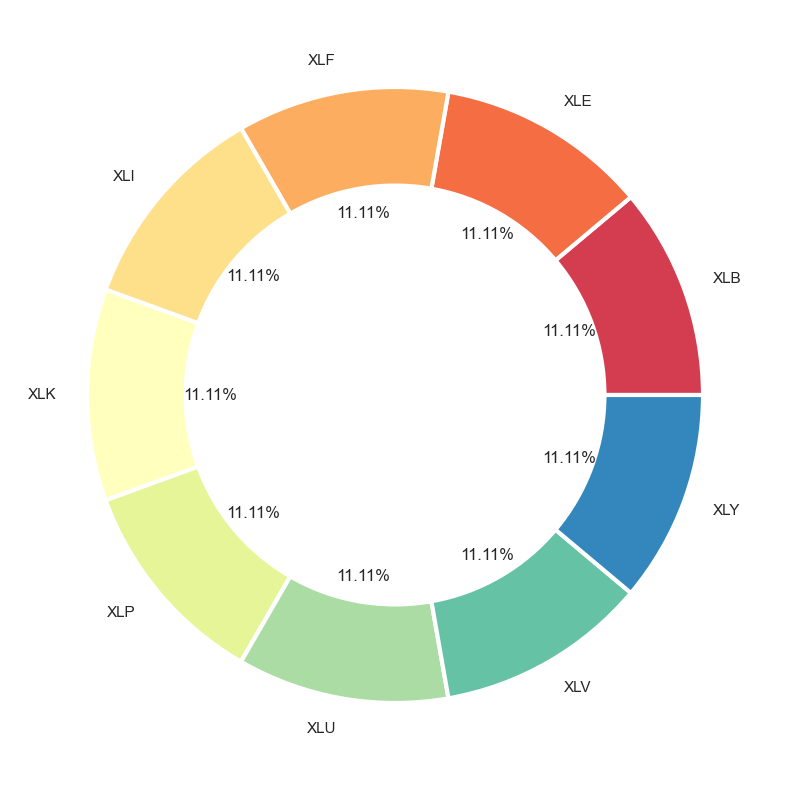

In [10]:
plt.figure(figsize=(10, 10))
wedgeprops = {'width': 0.32, 'edgecolor': 'w', 'linewidth': 3} #파이차트 틈 사이사이 세팅
plt.pie(weights, labels=tickers, autopct='%.2f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

Text(0, 0.5, 'Weights')

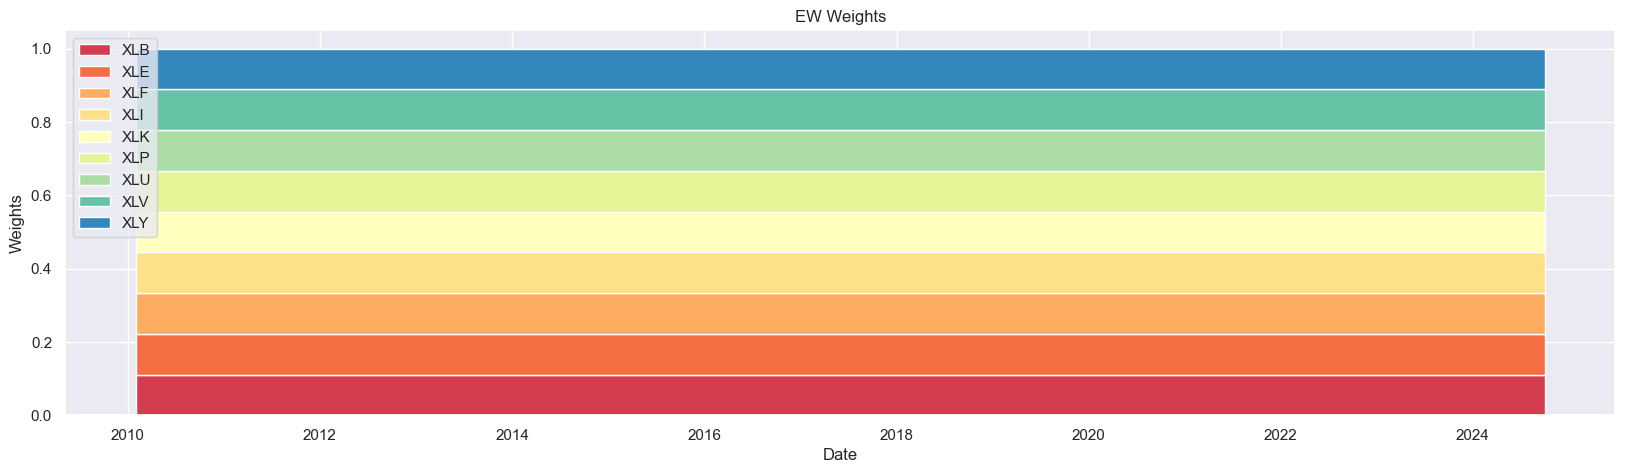

In [11]:
ew_w_df = pd.DataFrame(get_ew_weights(rets), index=rets.index, columns=rets.columns)


plt.figure(figsize=(20, 5))
plt.stackplot(ew_w_df.index, ew_w_df.T, labels=ew_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('EW Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

In [13]:
ew_w_df

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2010-02-28 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2010-03-31 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2010-04-30 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2010-05-31 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2024-06-30 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2024-07-31 00:00:00+00:00,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


In [17]:
rets

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-28 00:00:00+00:00,0.045123,0.030092,0.035261,0.053324,0.034829,0.031680,-0.013207,0.003836,0.055690
2010-03-31 00:00:00+00:00,0.079161,0.028169,0.088989,0.086929,0.068397,0.037674,0.026906,0.026674,0.078069
2010-04-30 00:00:00+00:00,0.002064,0.041551,0.013167,0.042574,0.012554,-0.010741,0.026299,-0.038905,0.060292
2010-05-31 00:00:00+00:00,-0.095322,-0.114505,-0.091585,-0.091188,-0.074819,-0.046326,-0.055191,-0.065091,-0.070362
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,0.032720,-0.003422,0.031715,0.016376,0.070770,0.024371,0.089602,0.024015,0.001993
2024-06-30 00:00:00+00:00,-0.030584,-0.014142,-0.008819,-0.009889,0.078354,-0.002351,-0.055426,0.018240,0.038770
2024-07-31 00:00:00+00:00,0.043370,0.022600,0.063975,0.049151,-0.032843,0.016584,0.068242,0.026621,0.027906


Text(0, 0.5, 'Returns')

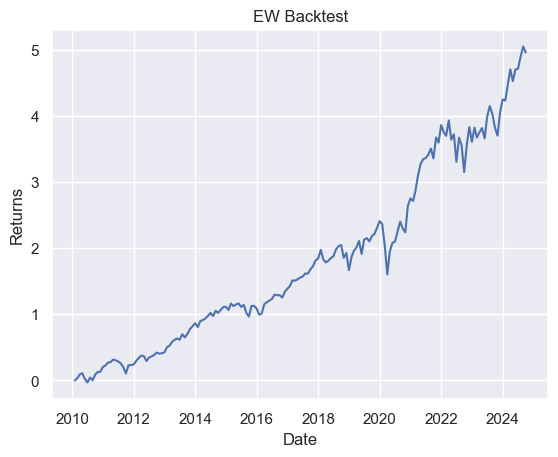

In [12]:
port_rets = ew_w_df.shift() * rets
port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1


plt.plot(port_cum_rets)
plt.title('EW Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')

In [18]:
port_cum_rets

Date
2010-01-31 00:00:00+00:00    0.000000
2010-02-28 00:00:00+00:00    0.030736
2010-03-31 00:00:00+00:00    0.090401
2010-04-30 00:00:00+00:00    0.108435
2010-05-31 00:00:00+00:00    0.021683
                               ...   
2024-05-31 00:00:00+00:00    4.699430
2024-06-30 00:00:00+00:00    4.708393
2024-07-31 00:00:00+00:00    4.889543
2024-08-31 00:00:00+00:00    5.046566
2024-09-30 00:00:00+00:00    4.954590
Freq: ME, Length: 177, dtype: float64